S : population matrix
P1 : matrix of chosen parent 1
P2 : matrix of chosen parent 2
C1 : matrix of gamete parent 1
C2 : matrix fo gamete parent 2
F : matrix of offspring


In [1]:
import numpy as np
import time

In [2]:
D = 3 ; N = 5
seedValue = 102
rng = np.random.default_rng(seedValue)

P1_0 = np.full([D,N],0)
P2_0 = np.full([D,N],2)

In [3]:
bin = rng.binomial(1,0.5,[D,N])
print(bin)
print(bin*2)

[[0 1 1 0 1]
 [0 1 1 1 0]
 [0 0 1 1 1]]
[[0 2 2 0 2]
 [0 2 2 2 0]
 [0 0 2 2 2]]


In [4]:
a = []
for i in range(100):
    bin = rng.binomial(1,0.5,[D,N])*2
    a.append(np.mean(bin))
print(a)
print(np.mean(a))

[1.2, 0.8, 1.2, 0.9333333333333333, 1.2, 0.6666666666666666, 0.6666666666666666, 1.0666666666666667, 0.5333333333333333, 0.9333333333333333, 1.0666666666666667, 1.0666666666666667, 0.9333333333333333, 0.6666666666666666, 1.0666666666666667, 1.6, 1.0666666666666667, 1.2, 1.3333333333333333, 1.0666666666666667, 0.8, 0.8, 0.9333333333333333, 1.4666666666666666, 0.9333333333333333, 1.6, 0.5333333333333333, 1.0666666666666667, 0.9333333333333333, 1.3333333333333333, 1.2, 1.0666666666666667, 1.2, 0.6666666666666666, 1.0666666666666667, 1.3333333333333333, 1.2, 1.0666666666666667, 0.9333333333333333, 1.3333333333333333, 1.4666666666666666, 0.6666666666666666, 0.9333333333333333, 0.9333333333333333, 1.3333333333333333, 1.0666666666666667, 1.0666666666666667, 0.6666666666666666, 1.0666666666666667, 1.0666666666666667, 1.6, 1.6, 1.0666666666666667, 0.5333333333333333, 0.8, 1.0666666666666667, 0.9333333333333333, 0.5333333333333333, 1.0666666666666667, 1.0666666666666667, 0.8, 0.9333333333333333,

In [5]:
#check numpy.place is working
P1 = rng.binomial(1,0.5,[D,N])
print(P1)
a = rng.binomial(1,0.5,[D,N])*2

np.place(P1,P1 == 1,a)
print(P1)

[[0 1 1 0 0]
 [0 1 1 1 1]
 [0 0 0 1 1]]
[[0 2 2 0 0]
 [0 0 0 2 0]
 [0 0 0 2 0]]


In [6]:
P1 = rng.binomial(1,0.5,[D,N])
print(P1)
np.place(P1,P1 == 1,rng.binomial(1,0.5,[D,N])*2)
print(P1)
print(np.mean(P1))

[[0 1 1 1 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]
[[0 0 2 0 0]
 [0 2 0 0 2]
 [0 0 0 0 0]]
0.4


In [7]:
P1 = rng.binomial(1,0.5,[D,N])
#print(P1)
C1 = P1
np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
print(C1)


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [8]:
P2 = rng.binomial(1,0.5,[D,N])
#print(P2)
C2 = P2
np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
print(C2)

[[2 0 0 0 2]
 [0 0 0 2 0]
 [0 0 2 0 0]]


In [9]:
F = (C1 + C2)/2
print(F)

[[1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [10]:
b = rng.integers(low=0,high=N,size=N)
print(b)

[3 4 1 0 1]


In [11]:
S = np.zeros([1,D])
for i in b:
    s = np.asmatrix(F[:,i])
    S = np.concatenate((S,s),axis=0)
print(S)
S = np.delete(S,0,0)
print(S)
S = S.T
print(S)

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
[[0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [12]:
S = np.matrix(np.zeros([1,D]))
for i in b:
    s = np.asmatrix(F[:,i])
    S = np.concatenate((S,s),axis=0)
print(S)
S = np.delete(S,0,0).T
print(S)


[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
[[0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [13]:
print(S == 1
      )
print((S == 1) == True)
if 1 in np.zeros([2,3]):
    print('still have 1')
else:
    print('OK, no one')

[[False  True False  True False]
 [ True False False False False]
 [False False False False False]]
[[False  True False  True False]
 [ True False False False False]
 [False False False False False]]
OK, no one


In [14]:
def hybridisation_no_selection_printed(P1,P2,N,seedValue):
    rng = np.random.default_rng(seedValue)
    G = 1 #number of generations
    D = P1.shape[0]
    C1 = P1
    np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
    print(C1)
    C2 = P2
    np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
    print(C2)
    F = np.matrix((C1 + C2)/2)
    print(f"F0\n{F}")

    while 1 in F:
        # sample two parental populations from the new population with replacement
        b1 = rng.integers(low=0,high=N,size=N)
        print(f'b1\n{b1}')
        S1 = np.zeros([D,1])
        for i in b1:
            s = F[:,i]
            S1 = np.concatenate((S1,s),axis=1)
        S1 = np.delete(S1,0,1)
        print(f"S1{S1}")

        b2 = rng.integers(low=0,high=N,size=N)
        print(f'b2\n{b2}')
        # sample from the new population with replacement
        S2 = np.zeros([D,1])
        for i in b2:
            s = F[:,i]
            S2 = np.concatenate((S2,s),axis=1)
        S2 = np.delete(S2,0,1)
        print(f"S2\n{S2}")

        # a new hybridisation
        C1 = S1
        np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
        print(C1)
        C2 = S2
        np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
        print(C2)
        F = (C1 + C2)/2
        G += 1
        print(f"F {G}")
        print(F)
    H = np.mean(F)/2
    return F, G,H



In [15]:
def hybridisation_no_selection_timed(P1,P2,N,seedValue):
    tic = time.time()
    rng = np.random.default_rng(seedValue)
    G = 1 #number of generations
    D = P1.shape[0]
    C1 = P1
    np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
    C2 = P2
    np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
    F = np.matrix((C1 + C2)/2)
    toc = time.time()
    print(f"part 1 took: {(toc-tic):.3f} seconds.")
    loop_start = time.time()
    while 1 in F:
        # sample two parental populations from the new population with replacement
        tic = time.time()
        b1 = rng.integers(low=0,high=N,size=N)

        S1 = np.zeros([D,1])
        for i in b1:
            s = F[:,i]
            S1 = np.concatenate((S1,s),axis=1)
        S1 = np.delete(S1,0,1)


        b2 = rng.integers(low=0,high=N,size=N)
        # sample from the new population with replacement
        S2 = np.zeros([D,1])
        for i in b2:
            s = F[:,i]
            S2 = np.concatenate((S2,s),axis=1)
        S2 = np.delete(S2,0,1)
        toc = time.time()
        print(f"part 2 took: {(toc-tic):.3f} seconds.")
        tic = time.time()
        # a new hybridisation
        C1 = S1
        np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)

        C2 = S2
        np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
        F = (C1 + C2)/2
        G += 1
        #print(f"F {G}")
        #print(F)
        toc = time.time()
        print(f"part 3 took: {(toc-tic):.3f} seconds.")
    loop_end = time.time()
    print(f"loop took {(loop_end-loop_start) :.3f} seconds")
    H = np.mean(F)/2

    return F, G, H



In [16]:
def hybridisation_no_selection(P1,P2,N,seedValue):
    rng = np.random.default_rng(seedValue)
    t = 1 #number of generations
    D = P1.shape[0]
    C1 = P1
    np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
    C2 = P2
    np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
    F = np.matrix((C1 + C2)/2)

    while 1 in F:
        # sample two parental populations from the new population with replacement
        b1 = rng.integers(low=0,high=N,size=N)

        S1 = np.zeros([D,1])
        for i in b1:
            s = F[:,i]
            S1 = np.concatenate((S1,s),axis=1)
        S1 = np.delete(S1,0,1)

        b2 = rng.integers(low=0,high=N,size=N)
        # sample from the new population with replacement
        S2 = np.zeros([D,1])
        for i in b2:
            s = F[:,i]
            S2 = np.concatenate((S2,s),axis=1)
        S2 = np.delete(S2,0,1)

        # a new hybridisation
        C1 = S1
        np.place(C1,C1 == 1,rng.binomial(1,0.5,[D,N])*2)
        C2 = S2
        np.place(C2,C2 == 1,rng.binomial(1,0.5,[D,N])*2)
        F = (C1 + C2)/2
        t += 1
        #print(f"F {G}")
        #print(F)
    H = np.mean(F)/2

    return F, t, H



# generation time by N

In [17]:
rng = np.random.default_rng(214)
N_list = np.arange(start=10,stop=101,step=5)
D = 10
repeats = 100
all_t = []; all_H = []
for N in N_list:
    print(f"N={N}")
    P1 = np.zeros([D,N])
    P2 = np.full([D,N],2)
    t = []; H = []
    for i in range(100):
        w = hybridisation_no_selection(P1,P2,N,seedValue=None)
        t.append(w[1])
        H.append(w[2])
    all_t.append(t)
    all_H.append(H)

print(all_t)
print(all_H)


N=10
N=15
N=20
N=25
N=30
N=35
N=40
N=45
N=50
N=55
N=60
N=65
N=70
N=75
N=80
N=85
N=90
N=95
N=100
[[66, 138, 60, 52, 89, 36, 48, 104, 65, 57, 72, 73, 93, 44, 38, 89, 41, 60, 90, 115, 69, 69, 65, 60, 61, 100, 52, 87, 28, 28, 43, 72, 47, 50, 91, 95, 36, 50, 49, 62, 79, 66, 54, 61, 49, 57, 46, 40, 52, 56, 65, 32, 142, 92, 125, 115, 44, 51, 92, 52, 36, 48, 92, 59, 62, 40, 52, 59, 54, 36, 103, 67, 68, 77, 73, 33, 48, 42, 63, 53, 97, 52, 62, 67, 81, 98, 34, 77, 62, 49, 35, 52, 51, 56, 58, 50, 72, 87, 56, 55], [112, 74, 100, 143, 295, 105, 100, 46, 81, 38, 60, 85, 98, 97, 58, 102, 98, 106, 50, 122, 81, 163, 83, 53, 62, 148, 108, 67, 200, 189, 60, 162, 87, 96, 89, 128, 94, 52, 70, 80, 64, 134, 106, 114, 130, 124, 139, 73, 56, 53, 56, 77, 86, 118, 110, 88, 95, 47, 56, 93, 49, 129, 71, 104, 134, 82, 130, 137, 90, 114, 105, 119, 73, 146, 75, 102, 66, 172, 133, 88, 80, 32, 99, 42, 52, 124, 59, 97, 114, 82, 154, 81, 67, 137, 77, 107, 84, 162, 83, 81], [112, 91, 98, 209, 93, 142, 107, 168, 150, 134, 1

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [ ]:
#save results
columns = N_list
variedN_t_df = pd.DataFrame()

In [19]:
# graph for t versus N
t_mean = []
t_std = []
H_mean = []
H_std = []
for mean in all_t:
    t_mean.append(np.mean(mean))
    t_std.append(np.std(mean))
for mean in all_H:
    H_mean.append(np.mean(mean))
    H_std.append(np.std(mean))

Y = t_mean
X = N_list
X = sm.add_constant(N_list)
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

/Users/peng/.conda/envs/practical3/lib/python3.10/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3144.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           9.82e-21
Time:                        14:47:41   Log-Likelihood:                -75.998
No. Observations:                  19   AIC:                             156.0
Df Residuals:                      17   BIC:                             157.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5514      7.188      0.077      0.940     -14.614      15.716
x1             6.5592      0.117     56.068      0.000       6.312       6.806
==============================================================================
Omnibus:                       10.198   Durbin-Watson:                   2.700
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.701
Skew:                           1.147   Prob(JB):                       0.0213
Kurtosis:                       5.114   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print(model_result.params)
con = model_result.params[0]
coe = model_result.params[1]
line = coe*N_list + con
print(line)

[0.55135088 6.5592386 ]
[ 66.14373684  98.93992982 131.73612281 164.53231579 197.32850877
 230.12470175 262.92089474 295.71708772 328.5132807  361.30947368
 394.10566667 426.90185965 459.69805263 492.49424561 525.2904386
 558.08663158 590.88282456 623.67901754 656.47521053]


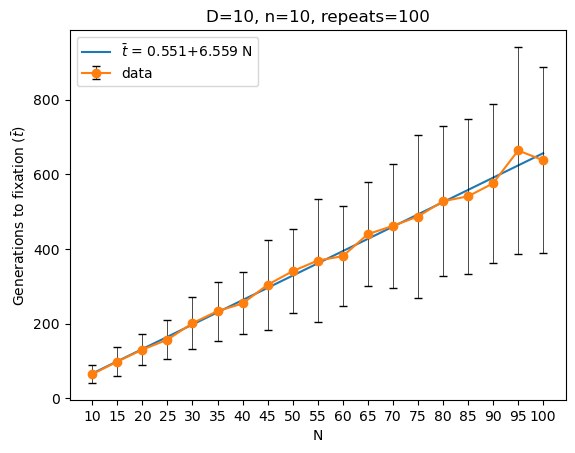

In [38]:
plt.plot(N_list,line)
plt.errorbar(N_list,t_mean,yerr=t_std,fmt='o-',ecolor='k',elinewidth=0.5, capsize=3)

plt.xlabel('N')
plt.ylabel(r'Mean generations to fixation ($\bar{t}$)')
plt.title('D=10, n=10, repeats=100')
plt.xticks(N_list)
plt.legend([r"$\bar{t}$"+f' = {con:.3f}+{coe:.3f} N','data'])
plt.show()

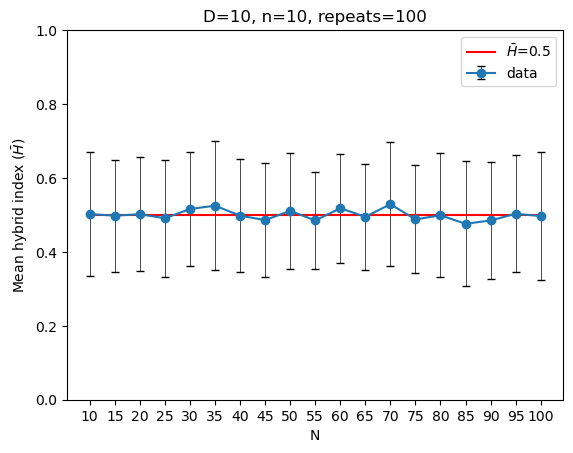

In [41]:
plt.errorbar(N_list,H_mean,yerr=H_std,fmt='o-',ecolor='k',elinewidth=0.5, capsize=3)
plt.plot(N_list,np.full(len(N_list),0.5),'r')
plt.xlabel('N')
plt.ylabel(r'Mean hybrid index ($\bar{H}$)')
plt.title('D=10, n=10, repeats=100')
plt.xticks(N_list)
plt.ylim(0,1)
plt.legend([r'$\bar{H}$=0.5','data'])
plt.show()

In [23]:
D = 20; N = 100
P1 = np.full([D,N],0)
P2 = np.full([D,N],2)
hybridisation_no_selection_timed(P1,P2,N=N,seedValue=None)

part 1 took: 0.001 seconds.
part 2 took: 0.010 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.003 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.003 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.006 seconds.
part 3 took: 0.001 seconds.
part 2 took: 0.005 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.008 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.007 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.008 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.003 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 seconds.
part 3 took: 0.006 seconds.
part 2 took: 0.006 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.011 seconds.
part 3 took: 0.000 seconds.
part 2 took: 0.004 s

(matrix([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [2., 2., 2., ..., 2., 2., 2.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [2., 2., 2., ..., 2., 2., 2.],
         [0., 0., 0., ..., 0., 0., 0.]]),
 1504,
 0.35)

In [24]:
print(np.mean([[2,2],[2,0]])/2)

0.75


In [25]:
# check if generation increases with population size
D = 3; N = 4
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=4,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    #print(f'F{a}\n{F}')
#print(A)
print(f"N = 4, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

N = 4, mean generation time: 15.03, mean hybrid index: 0.48333333333333345


In [26]:
# check if generation increases with population size
D = 3; N = 8
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=N,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    #print(f'F{a}\n{F}')
#print(A)
print(f"N = 8, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

N = 8, mean generation time: 30.35, mean hybrid index: 0.48541666666666655


In [27]:
# check if generation increases with population size
D = 3; N = 16
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=N,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    print(f'F{a}\n{F}')
print(A)
print(f"N = 16, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

F175
[[2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
F45
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
F56
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
F46
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]
F45
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]
F83
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
F77
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [28]:
# check if generation increases with number of derived loci
D = 6; N = 8
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=N,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    print(f'F{a}\n{F}')
print(A)
print(f"D = 6, N = 8, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

F52
[[2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]]
F39
[[2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
F22
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]]
F47
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]]
F28
[[0. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]]
F33
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]

In [29]:
# check if generation increases with number of derived loci
D = 12; N = 8
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=N,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    print(f'F{a}\n{F}')
print(A)
print(f"12 = 6, N = 8, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

F59
[[2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
F32
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
F74
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
F75
[[2. 2. 2

In [30]:
# check if generation increases with number of derived loci
D = 20; N = 50
A = []
H = []
for i in range(100):
    w = hybridisation_no_selection(P1=np.zeros([D,N]),P2=np.full([D,N],2),N=N,seedValue = None)
    F = w[0]
    a = w[1]
    h = w[2]
    A.append(a)
    H.append(h)
    #print(f'F{a}\n{F}')
print(A)
print(f"D = {D}, N = {N}, mean generation time: {np.mean(A)}, mean hybrid index: {np.mean(H)}")

[399, 538, 661, 297, 464, 329, 389, 481, 227, 489, 252, 648, 271, 507, 216, 210, 516, 232, 389, 395, 281, 594, 364, 432, 401, 256, 751, 337, 376, 309, 487, 496, 303, 274, 488, 405, 566, 306, 304, 349, 442, 605, 304, 503, 455, 289, 300, 321, 299, 435, 393, 221, 233, 357, 299, 567, 354, 332, 371, 483, 368, 409, 595, 398, 525, 283, 370, 322, 604, 382, 294, 549, 344, 288, 594, 310, 328, 460, 369, 472, 384, 467, 327, 314, 275, 550, 382, 323, 231, 693, 462, 270, 632, 392, 265, 326, 536, 486, 419, 545]
D = 20, N = 50, mean generation time: 400.95, mean hybrid index: 0.49803000000000003


In [31]:
# check if generation increases with number of derived loci
D = 20; N = 100
A = []
tic = time.time()
for i in range(100):
    H = hybridisation_no_selection(P1=np.zeros([20,100]),P2=np.full([20,100],1),N=100,seedValue = None)
    #F = H[0]
    a = H[1]
    A.append(a)
    #print(f'F{a}\n{F}')
toc = time.time()
print(f'time of execution {(toc-tic):.3f} secinds')
#print(A)
print(f"D = 20, N = 100, mean generation time is {np.mean(A)}")

time of execution 304.916 secinds
D = 20, N = 100, mean generation time is 776.74


In [32]:
print(A)

[773, 1330, 997, 553, 766, 740, 457, 610, 435, 769, 681, 478, 652, 753, 601, 432, 753, 485, 1020, 727, 1117, 702, 931, 421, 687, 704, 1308, 958, 1584, 725, 1473, 654, 1126, 447, 1023, 488, 384, 800, 787, 883, 745, 610, 1369, 626, 892, 798, 596, 861, 1351, 461, 432, 1091, 726, 641, 871, 811, 401, 719, 739, 625, 798, 923, 490, 1261, 431, 997, 813, 1086, 386, 621, 872, 627, 738, 703, 943, 454, 863, 965, 468, 436, 602, 648, 814, 490, 862, 712, 605, 930, 669, 773, 710, 1178, 924, 1532, 678, 906, 422, 913, 887, 965]
